# **Краткое введение в Google Colab**
# **Что такое Colab?**

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:

*   не требуется никакой настройки;
*   бесплатный доступ к графическим процессорам;
*   предоставлять доступ к документам другим людям очень просто.

Это отличное решение для студентов, специалистов по обработке данных и исследователей в области искусственного интеллекта.

Напишем простую инструкцию и выполним ее:

In [ ]:
print("Hello, Google Colab!")

Hello, Google Colab!


Создадим список из 10 случайных чисел:

In [ ]:
import random

random_list = [random.randint(0, 100) for _ in range(10)]
print(random_list)

[74, 80, 21, 90, 34, 30, 8, 3, 28, 67]


Напишем функцию, которая возвращает сумму чисел в списке.

In [ ]:
def sumarize_numbers(numbers: list[int]) -> int:
  return sum(numbers)

Вызовем функцию и выведите результат на экран.

In [ ]:
result = sumarize_numbers(random_list)
print("Список случайных чисел:", random_list)
print("Сумма чисел в списке:", result)

Список случайных чисел: [74, 80, 21, 90, 34, 30, 8, 3, 28, 67]
Сумма чисел в списке: 435


# Работа с библиотеками:

Устанавливаем библиотеку numpy, если она не установлена
Данная библиотека должна быть установлена по умолчанию

In [ ]:
!pip install numpy

Импортируем библиотеку numpy и создаем массив из 20 случайных чисел.

In [ ]:
import numpy as np


random_array = np.random.randint(0, 100, size=20)

Вычислим среднее значение массива и выведем его на экран.

In [ ]:
average = np.mean(random_array)
print(average)

54.0


# Загрузка данных:

In [ ]:
import pandas as pd

url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv'
uploaded = pd.read_csv(url)

Используем библиотеку pandas для чтения CSV файла и выведем первые 5 строк данных.

In [ ]:
# Вывод первых 5 строк данных
print(uploaded.head(5))

  Month   "1958"   "1959"   "1960"
0   JAN      340      360      417
1   FEB      318      342      391
2   MAR      362      406      419
3   APR      348      396      461
4   MAY      363      420      472


# Визуализация данных:

Установим библиотеку matplotlib (если она не установлена):

In [ ]:
!pip install matplotlib

Построим простой график на основе данных из CSV файла.

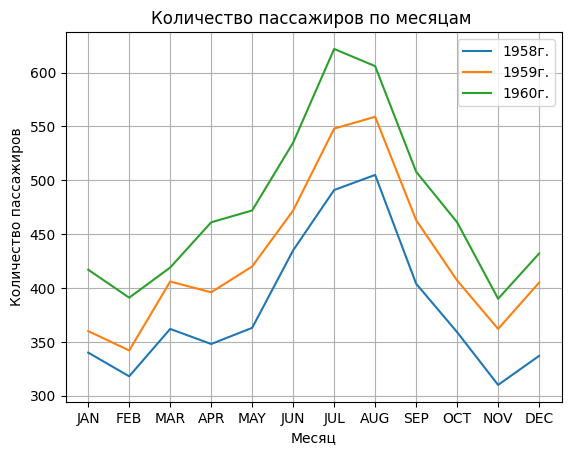

In [ ]:
import matplotlib.pyplot as plt


plt.plot(uploaded['Month'], uploaded[' "1958"'])
plt.plot(uploaded['Month'], uploaded[' "1959"'])
plt.plot(uploaded['Month'], uploaded[' "1960"'])
plt.title('Количество пассажиров по месяцам ')
plt.xlabel('Месяц')
plt.ylabel('Количество пассажиров')
plt.legend(['1958г.', '1959г.', '1960г.'])
plt.grid(True)
plt.show()

# Использование генетических алгоритмов:


In [ ]:
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 100

# Валидные гены
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
TARGET = "Lorem ipsum"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		Создаем хромосому или набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())


		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#Текущее поколение
	generation = 1

	found = False
	population = []

	# Новое поколение
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0:
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])


		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()


Generation: 1	String: 2WYG4 2]sAh	Fitness: 9
Generation: 2	String: 2WYG4 2]sAh	Fitness: 9
Generation: 3	String: UUR@m$ius Y	Fitness: 8
Generation: 4	String: UUR@m$ius Y	Fitness: 8
Generation: 5	String: UqrW&kips _	Fitness: 7
Generation: 6	String: UqrW&kips _	Fitness: 7
Generation: 7	String: UqrW&kips _	Fitness: 7
Generation: 8	String: e4r&i ips _	Fitness: 6
Generation: 9	String: e4r&i ips _	Fitness: 6
Generation: 10	String: UoW
m ipsTP	Fitness: 5
Generation: 11	String: UoW
m ipsTP	Fitness: 5
Generation: 12	String: For
f ipsu_	Fitness: 4
Generation: 13	String: For
f ipsu_	Fitness: 4
Generation: 14	String: Lorzc ipsu8	Fitness: 3
Generation: 15	String: Lorzc ipsu8	Fitness: 3
Generation: 16	String: Lfrem ipsu_	Fitness: 2
Generation: 17	String: Lfrem ipsu_	Fitness: 2
Generation: 18	String: Lfrem ipsu_	Fitness: 2
Generation: 19	String: Lorem ipsu4	Fitness: 1
Generation: 20	String: Lorem ipsu4	Fitness: 1
Generation: 21	String: Lorem ipsu4	Fitness: 1
Generation: 22	String: Lorem ipsu4	Fitness: